# **Color Identification in Images**

In [1]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

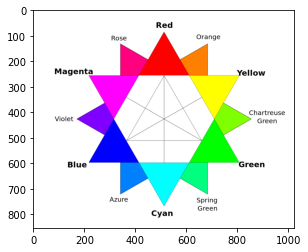

In [2]:
image_location = '1024px-RBG_color_wheel.svg.png'

img = cv2.imread(image_location)
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

**Now we will read the color CSV file**

In [3]:
colorsDataSet = pd.read_csv('colors.csv', header=None)

In [4]:
colorsDataSet.head(2)

,0,1,2,3,4,5
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143


**give the heading name to every column**

In [5]:
Columns_Names = ["Color", "Name of color", "Hexadecimal code", "R", "G", "B"]

colorsDataSet.columns = Columns_Names

colorsDataSet.head()

,Color,Name of color,Hexadecimal code,R,G,B
0,air_force_blue_raf,Air Force Blue (Raf),#5d8aa8,93,138,168
1,air_force_blue_usaf,Air Force Blue (Usaf),#00308f,0,48,143
2,air_superiority_blue,Air Superiority Blue,#72a0c1,114,160,193
3,alabama_crimson,Alabama Crimson,#a32638,163,38,56
4,alice_blue,Alice Blue,#f0f8ff,240,248,255


In [6]:
colorsDataSet.shape

(865, 6)

In [7]:
f"All the Colors Combination  = {255*255*255}"

'All the Colors Combination  = 16581375'

**Let’s declare some global variables which will be accessible along with the whole code**

In [8]:
flag_variable = False  # Clicked Value
r = g = b = x_coordinate = y_coordinate = 0

### **Function to  calculate minimum distance from all colors and get the most matching color**

In [9]:
def get_color_name(R, G, B):
    minimum_distance= 10000
    
    for i in range(len(colorsDataSet)):
        distance = abs(R - int(colorsDataSet.loc[i, "R"])) + abs(G - int(colorsDataSet.loc[i, "G"])) + abs(B - int(colorsDataSet.loc[i, "B"]))
        
        if distance <= minimum_distance:
            minimum_distance = distance
            color_name = colorsDataSet.loc[i, "Name of color"]
    return color_name

### **Now we will create the function to get the X, Y  coordinates of Image When mouse is  double clicked**

In [10]:
def getClickedParams(event, x_coordinate, y_coordinate, flags, parameters):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        global b, g, r, x_position, y_position, flag_variable
        
        flag_variable = True
        x_position = x_coordinate
        y_position = y_coordinate
        
        b, g, r = img[y_coordinate, x_coordinate]
        b = int(b)
        g = int(g)
        r = int(r)

**Mouse call back: This is the cv2 method that will detect the click from the user (left double click) and call the draw function.**

In [11]:
cv2.namedWindow('image')
cv2.setMouseCallback('image', getClickedParams)

In [12]:
while True:

    cv2.imshow("image", img)
    if flag_variable:
        
        # Draw the Rectangle Filled With the Specified Color
        cv2.rectangle(img, (20, 20), (750, 60), (b, g, r), cv2.FILLED)

        # Getting the color Name along with the R, G and B Values
        color_name = get_color_name(r, g, b) + ' R=' + str(r) + ' G=' + str(g) + ' B=' + str(b)

        # cv2.putText(img,text,origin,font,fontScale,color,thickness)
        cv2.putText(img, color_name, (50, 50), cv2.FONT_HERSHEY_SIMPLEX,
                    0.8, (255, 255, 255), 2)

        # If we have the Light color it will display the text in black
        if r + g + b >= 600:
            cv2.putText(img, color_name, (50, 50), cv2.FONT_HERSHEY_SIMPLEX,
                        0.8, (0, 0, 0), 2)
        
        # After all the cation the Clicked Event will be set to False
        flag_variable = False

    # Break the loop when user hits 'q' key
    if cv2.waitKey(20) & 0xFF == ord("q"):
        break

cv2.destroyAllWindows()